In [2]:
import torchaudio
import IPython.display as ipd
import os
import matplotlib.pyplot as plt
import numpy as np

In [12]:
def display_shift(path, n_steps):
    signal, sr = torchaudio.load(path, normalize=True)
    pitch_shift = torchaudio.transforms.PitchShift(sr, n_steps)
    signal_shift = pitch_shift(signal)
#     if signal.shape[0] > 1:
#         # Defaulting everything to mono
#         signal = signal.mean(axis=0).unsqueeze(0)
    plt.figure()
    plt.plot(signal[0])
    plt.plot(signal_shift.detach()[0])
    
    shift_path = f"{path}_pitchup.wav"
    torchaudio.save(shift_path, src = signal_shift, sample_rate = sr)
    display(ipd.Audio(path))
    display(ipd.Audio(shift_path))

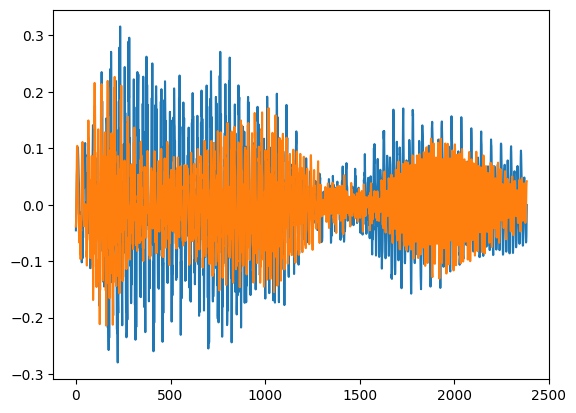

In [25]:
path = '../datasets/audioMinst/0_george_0.wav'

display_shift(path, 3)

In [5]:
sr = 8000
folder = '../datasets/audioMinst'
target_folder = '../datasets/audioMnist-pitch-up'
orig_files = os.listdir(folder)
n_steps = np.round(np.random.normal(4.5, 0.5, size = len(orig_files)), 1)
pitch_shifts = { k: torchaudio.transforms.PitchShift(sr, k) for k in n_steps }

for i in range(len(orig_files)):
    f = orig_files[i]
    steps = n_steps[i]
    signal, sr = torchaudio.load(f"{folder}/{f}", normalize = True)
    signal_shift = pitch_shifts[steps](signal)
    torchaudio.save(f"{target_folder}/{f[:-4]}_pitch_up.wav", src = signal_shift, sample_rate = sr)

In [84]:
def audio_compare(filename):
    display(ipd.Audio(f"{folder}/{filename}.wav"))
    display(ipd.Audio(f"{target_folder}/{filename}_pitch_up.wav"))

In [78]:
audio_compare("0_george_0")

In [66]:
audio_compare("0_lucas_30")

In [67]:
audio_compare("0_lucas_40")

In [68]:
audio_compare("2_yweweler_40")

In [69]:
audio_compare("3_jackson_40")

In [18]:
# signal, sr = torchaudio.load(f"{folder}/2_lucas_0.wav", normalize = True)
# torchaudio.save("test.wav", src = signal, sample_rate = int(sr * 2 ** 0.5))
# ipd.Audio('test.wav')

In [8]:
# https://parselmouth.readthedocs.io/en/stable/examples/pitch_manipulation.html
# !pip install praat-parselmouth
import parselmouth

def change_pitch(sound, factor):
    manipulation = call(sound, "To Manipulation", 0.01, 75, 600)
    pitch_tier = call(manipulation, "Extract pitch tier")
    call(pitch_tier, "Multiply frequencies", sound.xmin, sound.xmax, factor)
    call([pitch_tier, manipulation], "Replace pitch tier")
    return call(manipulation, "Get resynthesis (overlap-add)")

ModuleNotFoundError: No module named 'parselmouth'

In [83]:
audio_compare('0_lucas_0')